# Pokémons classification

### Data processing
#### Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/pokemon_modified.csv')

#### Exploring the dataset and removing two redundant features

In [3]:
df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,name,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,45,Bulbasaur,88.1,grass,65,65,45,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,60,Ivysaur,88.1,grass,80,80,60,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,80,Venusaur,88.1,grass,122,120,80,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,39,Charmander,88.1,fire,60,50,65,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,58,Charmeleon,88.1,fire,80,65,80,19.0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

In [5]:
df.select_dtypes('object').head()

,classification,name,type1
0,Seed Pokémon,Bulbasaur,grass
1,Seed Pokémon,Ivysaur,grass
2,Seed Pokémon,Venusaur,grass
3,Lizard Pokémon,Charmander,fire
4,Flame Pokémon,Charmeleon,fire


In [6]:
print(f"Number of unique classification class values: {len(df['classification'].unique())}")

Number of unique classification class values: 588


From dataset, I chose columns that contain non-numerical values. I think that "classification" and "name" are redundant because the name of Pokémon does not affect its target attribute, and the classification feature has too many values for encoding and analyzing. So I drop them.

In [7]:
df.drop(['classification', 'name'], axis=1, inplace=True)

#### Splitting the data
Use random_state = 123, stratify, and set test_size = 0.2

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('is_legendary', axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    df.is_legendary,
    stratify=df.is_legendary,
    random_state=123,
    test_size=0.2
)

Check if the dataset is balanced or not and comment on it

In [9]:
print(f'% of legendary pokemons in the whole data: {sum(df.is_legendary == 1) * 100 / len(df.is_legendary)}')
print(f'% of legendary pokemons in train sample: {sum(y_train == 1) * 100 / len(y_train)}')
print(f'% of legendary pokemons in test sample: {sum(y_test == 1) * 100 / len(y_test)}')

% of legendary pokemons in the whole data: 8.739076154806492
% of legendary pokemons in train sample: 8.75
% of legendary pokemons in test sample: 8.695652173913043


As we can see, the percentage of legendary Pokémon is small in the whole dataset. Hence, it is small in train sample and test sample, too. Using stratification, we balance values in both samples.

#### Checking for missing values

In [10]:
df.isna().sum()

against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
defense               0
experience_growth     0
height_m             20
hp                    0
percentage_male      98
type1                 0
sp_attack             0
sp_defense            0
speed                 0
weight_kg            20
generation            0
is_legendary          0
dtype: int64

#### Impute the missing values

In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train)

X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

#### Double check that there are no missing values

In [12]:
miss_check = pd.concat([X_train.isna().sum(), X_test.isna().sum()], axis=1)
miss_check.columns = ['Train', 'Test']
miss_check

,Train,Test
against_bug,0,0
against_dark,0,0
against_dragon,0,0
against_electric,0,0
against_fairy,0,0
against_fight,0,0
against_fire,0,0
against_flying,0,0
against_ghost,0,0
against_grass,0,0


#### Encode categorically

When we decided what columns should be dropped, we noticed that there are three object type columns. So, I encode the undeleted column.

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[['type1']]).toarray(),
                               columns=encoder.get_feature_names_out(['type1']))

X_test_encoded = pd.DataFrame(encoder.fit_transform(X_test[['type1']]).toarray(),
                              columns=encoder.get_feature_names_out(['type1']))

X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

X_train.drop('type1', axis=1, inplace=True)
X_test.drop('type1', axis=1, inplace=True)

In [14]:
X_train.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,1.0,1.0,1.0,2.0,1.0,2.0,0.25,0.5,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,2.0,1.0,1.0,0.5,0.5,0.5,1.0,2.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Scale the data

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Define a MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler on both train and test features
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Check the scaled data
X_train.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,0.2,0.200000,0.5,0.500,0.200000,0.500,0.000000,0.066667,0.25,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.2,0.466667,0.5,0.250,0.066667,0.125,0.066667,0.200000,0.50,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.200000,0.5,0.250,0.200000,0.500,0.200000,0.200000,0.00,0.200000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.200000,0.5,0.000,0.200000,0.250,0.200000,0.200000,0.25,0.466667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Correlation Matrix

Are there highly co-related features in the dataset? Is it a problem? Explain in the markdown cell.

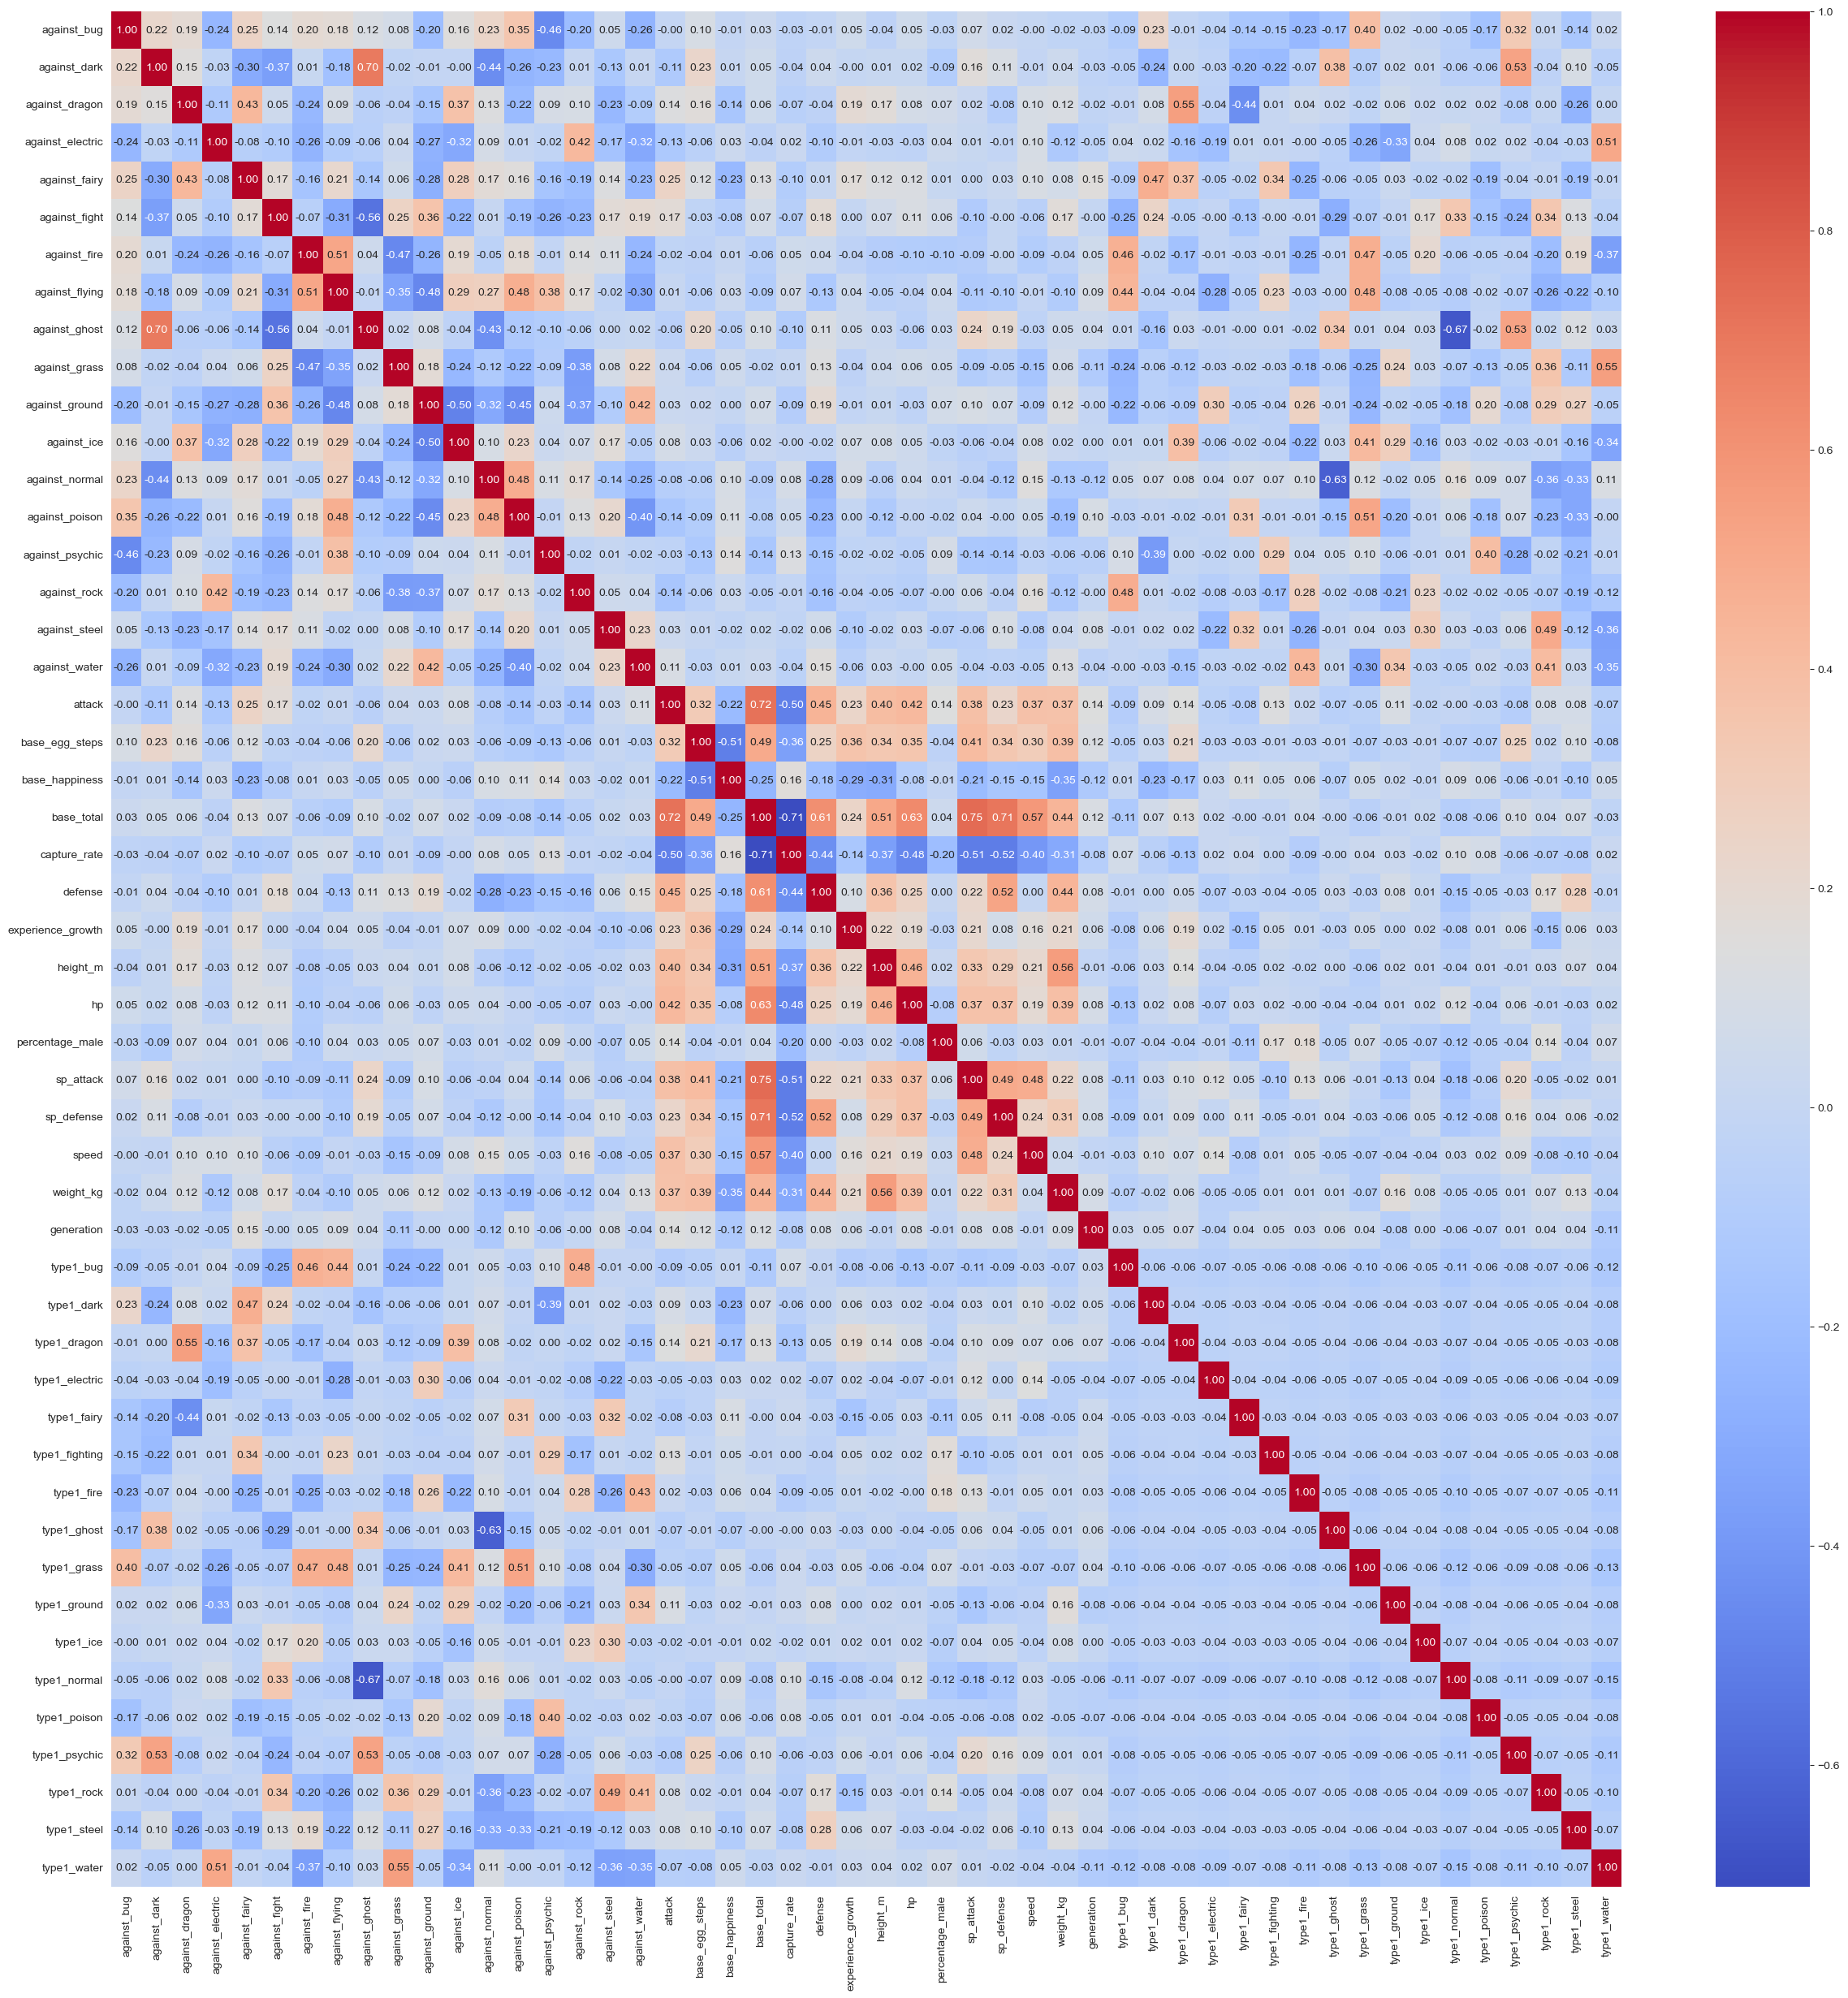

In [16]:
plt.figure(figsize=(30, 30))

# Plot the correlation matrix
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Using heatmap, we can see some correlations between features. Notice that several features have correlation with base_total. Most likely that best_total is the sum of the following features: attack, sp_attack, defense, sp_defense, hp, speed.

In [17]:
check = pd.DataFrame(
    {
        'attack': df['attack'],
        'sp_attack': df['sp_attack'],
        'defense': df['defense'],
        'sp_defense': df['sp_defense'],
        'hp': df['hp'],
        'speed': df['speed'],
        'base_total': df['base_total'],
        'sum': df['attack'] + df['sp_attack'] + df['defense'] + df['sp_defense'] + df['hp'] + df['speed']
    }
)

check.head(15)

,attack,sp_attack,defense,sp_defense,hp,speed,base_total,sum
0,49,65,49,65,45,45,318,318
1,62,80,63,80,60,60,405,405
2,100,122,123,120,80,80,625,625
3,52,60,43,50,39,65,309,309
4,64,80,58,65,58,80,405,405
5,104,159,78,115,78,100,634,634
6,48,50,65,64,44,43,314,314
7,63,65,80,80,59,58,405,405
8,103,135,120,115,79,78,630,630
9,30,20,35,20,45,45,195,195


According to the dataframe above, base_total is truly the sum of the features. Therefore, it is better to drop them because they do not give us any additional information and may cause multicollinearity.

In [18]:
X_train.drop(['attack', 'sp_attack', 'defense', 'sp_defense', 'hp', 'speed'], axis=1, inplace=True)
X_test.drop(['attack', 'sp_attack', 'defense', 'sp_defense', 'hp', 'speed'], axis=1, inplace=True)

### Model fitting and Comparison

#### Tuning LR model

In [19]:
from sklearn import metrics


# Calculate and print classification metrics: accuracy, precision, recall, and F1 score 
def print_clf_metrics(y_actual, y_pred):
    print(f'Accuracy: {metrics.accuracy_score(y_actual, y_pred)}')
    print(f'Precision: {metrics.precision_score(y_actual, y_pred)}')
    print(f'Recall: {metrics.recall_score(y_actual, y_pred)}')
    print(f'F1-score: {metrics.f1_score(y_actual, y_pred)}')


In [20]:
# Create a parameter grid for Logistic Regression
parameters = [
    {
        'penalty': ['l1'],
        'C': np.logspace(-3, 3, 7),
        'solver': ['liblinear']
    },
    {
        'penalty': ['l2'],
        'C': np.logspace(-3, 3, 7),
        'solver': ['newton-cg', 'lbfgs', 'liblinear']
    }
]


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr_clf_gs = GridSearchCV(
    LogisticRegression(max_iter=1000),
    parameters,
    scoring='f1'
)

lr_clf_gs.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1'], 'solver': ['liblinear']},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear']}],
             scoring='f1')

In [22]:
print("Tuned Hyperparameters :", lr_clf_gs.best_params_)
print("Accuracy :", lr_clf_gs.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9339047619047619


#### Construct LR with the best params and Evaluate the LR with the best params

In [23]:
lr_clf = LogisticRegression(
    C=10.0,
    max_iter=1000,
    penalty='l1',
    solver='liblinear'
).fit(X_train, y_train)

lr_y_pred = lr_clf.predict(X_test)

In [24]:
print_clf_metrics(y_test, lr_y_pred)

Accuracy: 0.9937888198757764
Precision: 0.9333333333333333
Recall: 1.0
F1-score: 0.9655172413793104


#### Print the top 5 most influencing features and the top 5 ignored features

In [25]:
features_coef = pd.DataFrame(
    {
        'feature': X_train.columns.tolist(),
        'coef': lr_clf_gs.best_estimator_.coef_[0]
    }
)
# Most influencing features
features_coef.sort_values(by='coef', ascending=False).head(5)

,feature,coef
18,base_egg_steps,13.954256
20,base_total,11.156120
22,experience_growth,5.870709
33,type1_fire,2.880578
26,generation,1.716400


In [26]:
# Most ignored features
features_coef.sort_values(by='coef', ascending=True).head(5)

,feature,coef
21,capture_rate,-9.505830
38,type1_normal,-9.340962
2,against_dragon,-6.785880
24,percentage_male,-3.828487
23,height_m,-3.106201


#### Tuning KNN model

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Declare and train KNN inside GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 15)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine']
}

knn_clf_gs = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
).fit(X_train.values, y_train)

print("Tuned Hyperparameters :", knn_clf_gs.best_params_)
print("Accuracy :", knn_clf_gs.best_score_)

Tuned Hyperparameters : {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy : 0.95


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [28]:
knn_clf = KNeighborsClassifier(
    metric='euclidean',
    n_neighbors=1,
    weights='uniform',
).fit(X_train.values, y_train)

knn_y_pred = knn_clf.predict(X_test.values)

In [29]:
print_clf_metrics(y_test, knn_y_pred)

Accuracy: 0.9751552795031055
Precision: 1.0
Recall: 0.7142857142857143
F1-score: 0.8333333333333333


#### Fitting GNB to the data and evaluating the test dataset

In [30]:
from sklearn.naive_bayes import GaussianNB

# Declare and train GaussianNB. No hyperparameter tuning 
gauss_nb_clf = GaussianNB().fit(X_train, y_train)
gauss_y_pred = gauss_nb_clf.predict(X_test)

In [31]:
print_clf_metrics(y_test, gauss_y_pred)

Accuracy: 0.9254658385093167
Precision: 0.5384615384615384
Recall: 1.0
F1-score: 0.7000000000000001


#### Which metric is most appropriate for this task and why?

#### Compare the three classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? Explain

In [32]:
def metrics_list(y_actual, y_pred):
    return [
        metrics.accuracy_score(y_actual, y_pred),
        metrics.precision_score(y_actual, y_pred),
        metrics.recall_score(y_actual, y_pred),
        metrics.f1_score(y_actual, y_pred)
    ]

In [33]:
all_metrics = {
    'Logistic Regression': metrics_list(y_test, lr_y_pred),
    'KNN': metrics_list(y_test, knn_y_pred),
    'GaussianNB': metrics_list(y_test, gauss_y_pred)
}

metrics_df = pd.DataFrame(all_metrics, index=['Accuracy', 'Precision', 'Recall', 'F1-score'])
metrics_df

,Logistic Regression,KNN,GaussianNB
Accuracy,0.993789,0.975155,0.925466
Precision,0.933333,1.000000,0.538462
Recall,1.000000,0.714286,1.000000
F1-score,0.965517,0.833333,0.700000


To my mind, the most appropriate metric for this task is F1-score. It is a harmonic mean of precision and recall. 
According to the metrics, the best model for this task is Logistic Regression. It has the highest accuracy, precision, recall and F1-score. 

<b><span style="color: red"> Explain what kind of error (false negative or false positive) is more critical for this data set. </span></b>

In this dataset, it is better to have a false positive than a false negative. If we have a false negative, it means that we predict that a Pokémon is not legendary, however, it is. So, we can lose a legendary Pokémon. If we have a false positive, it means that we predict that a Pokémon is legendary, but it is not. It is not critical because we can catch a Pokémon and understand that it is not legendary.

If we rely on these arguments, it may seem that the KNN model is better because it has the highest precision. However, it has the lowest recall. It is better to choose model with the highest F1 score. So, the choice is Logistic Regression.